In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from keras.layers import Dropout
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

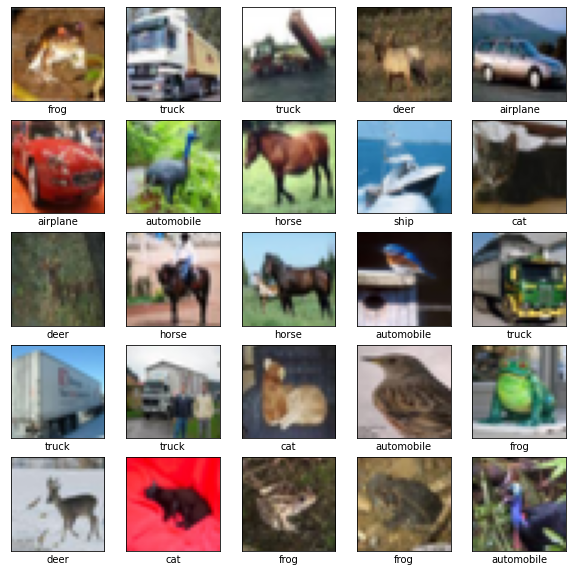

In [ ]:
names = ['bird','airplane', 'automobile', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 128)        

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5119 - accuracy: 0.4973 - val_loss: 1.4080 - val_accuracy: 0.5225
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9732 - accuracy: 0.6633 - val_loss: 1.0219 - val_accuracy: 0.6506
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7958 - accuracy: 0.7224 - val_loss: 1.0693 - val_accuracy: 0.6276
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6861 - accuracy: 0.7627 - val_loss: 0.7736 - val_accuracy: 0.7338
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6143 - accuracy: 0.7860 - val_loss: 0.8300 - val_accuracy: 0.7217
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5609 - accuracy: 0.8056 - val_loss: 0.6604 - val_accuracy: 0.7768
Epoch 7/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5061 - accuracy: 0.8249 - val_loss: 0.5916 - val_accuracy:

313/313 - 1s - loss: 0.6787 - accuracy: 0.7919


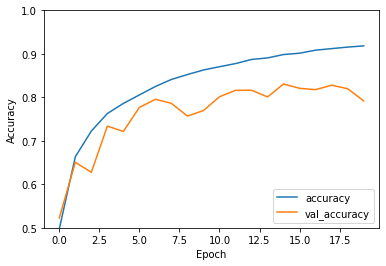

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7918999791145325


In [ ]:
import numpy as np
y_pred_test = model.predict(test_images)
y_pred_test_classes = np.max(test_labels, axis=1)
y_pred_test_max_probas = np.max(test_labels, axis=1)

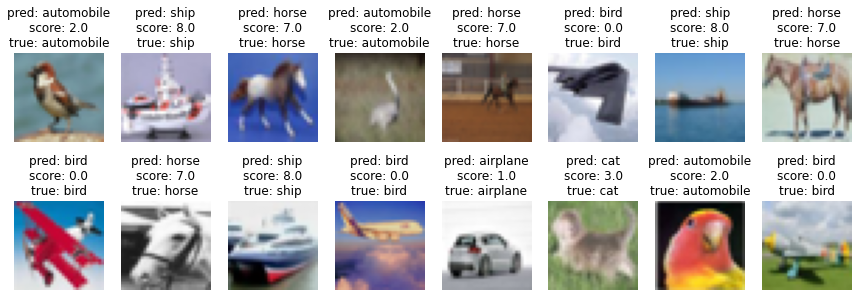

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(test_labels))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(test_images[random_index, :])
        pred_label =  names[y_pred_test_classes[random_index,]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = names[test_labels[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               str(pred_label), float(pred_proba), str(true_label)
        ))
plt.show()